# Chapter 14: Quantum Fourier Transform

Quantum Fourier Transform (QFT) and its applications.

---

**Note:** This notebook corresponds to Chapter 9 of the textbook.

**Prerequisites:**
- Python 3.8+
- Qiskit 2.1.2
- See `Chapter02_Software.ipynb` for installation instructions


In [1]:


from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator
from qiskit.circuit.library import QFTGate
import numpy as np
import matplotlib.pyplot as plt
from Chapter08_QuantumGates_functions import simulateCircuit, plot_measurement_results #type: ignore
from Chapter14_QFT_functions import (trignometricSignal,createDFTMatrix, processDFTResult, 
                                     plotDFTResult, QFTSignalProcessing, createQFTMatrix, processQFTResult, myQFT)

print('Setup complete!')

Setup complete!


In this chapter, we will study Quantum Fourier Transform (QFT), an extremely useful quantum algorithm, and its
quantum circuit implementation. QFT is the quantum equivalent of Discrete Fourier Transform (DFT), and plays
a vital role in many applications, including the solution of quantum phase estimation, Shor’s algorithm, machine
learning, etc. We will briefly review digital signals and their processing as a motivation to QFT.

## Signal Processing

### Trigonometric functions

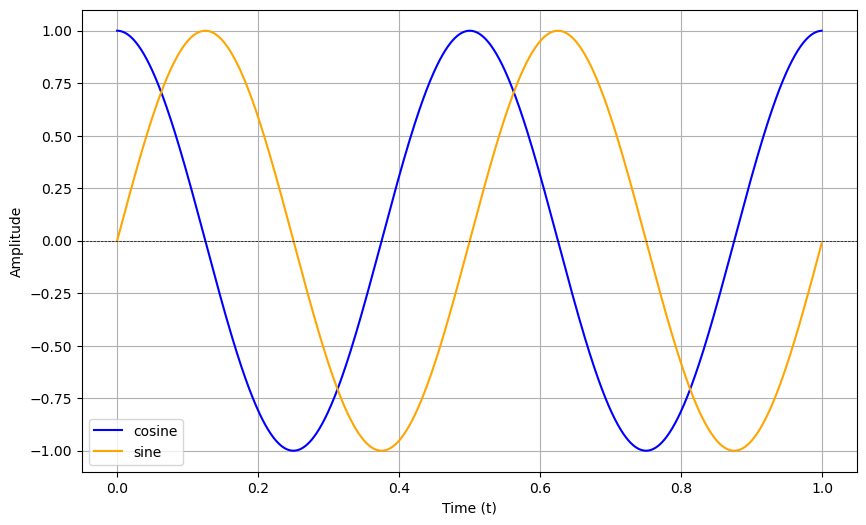

In [2]:
T = 1/2 # Period
omega = 2 * np.pi / T  # Angular frequency
nContinuousSamples = 1000 # for plotting
tPlot = np.linspace(0,1,nContinuousSamples,endpoint = False)
# Generate cosine and sine values
cosine_wave = np.cos(omega * tPlot)
sine_wave = np.sin(omega * tPlot)

# Plot the waves
plt.figure(figsize=(10, 6))
plt.plot(tPlot, cosine_wave, label='cosine', color='blue')
plt.plot(tPlot, sine_wave, label='sine', color='orange')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid(True)
plt.show()

### Repeating band-limited signals

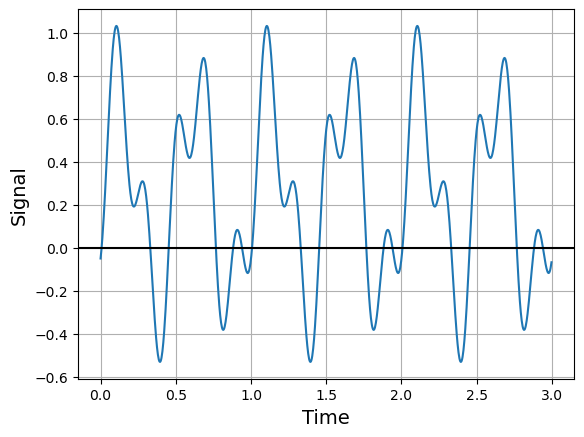

In [3]:

example = 3
if (example == 1):
	c = [0]
	s = [0, 0.5]
elif (example == 2):
	c = [0]
	s = [0, -0.3]
elif (example == 3):
	c = [0.25, 0 , 0, 0,0,-0.3]
	s = [0, 0, 0.5]
else:
	c = [-0.6*2/np.pi]
	s = [0.6]


T = 3
nContinuousSamples = 1000 # for plotting
tPlot = np.linspace(0,T,nContinuousSamples,endpoint = False)
yPlot = trignometricSignal(tPlot,c,s)
plt.plot(tPlot,yPlot)
plt.axhline(0, color='black')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Signal', fontsize=14)
plt.grid(visible=True)

### Repeating signal that is not band-limited

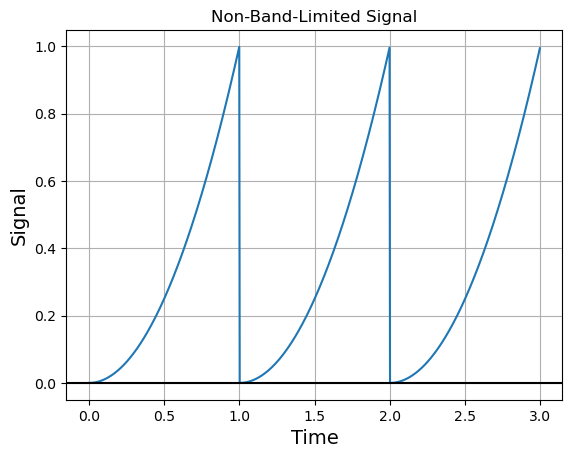

In [4]:
def non_band_limited_signal(t):
    signal = ((t-1) % 1)**2 
    return signal


nContinuousSamples = 1000  # For plotting
tPlot = np.linspace(0, 3, nContinuousSamples, endpoint=False)
yPlot = non_band_limited_signal(tPlot)

plt.plot(tPlot, yPlot)
plt.axhline(0, color='black')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Signal', fontsize=14)
plt.title('Non-Band-Limited Signal')
plt.grid(visible=True)
plt.show()

## Continuous Signal

[0.25, 0, 0, 0, 0, -0.3] [0, 0, 0.5]


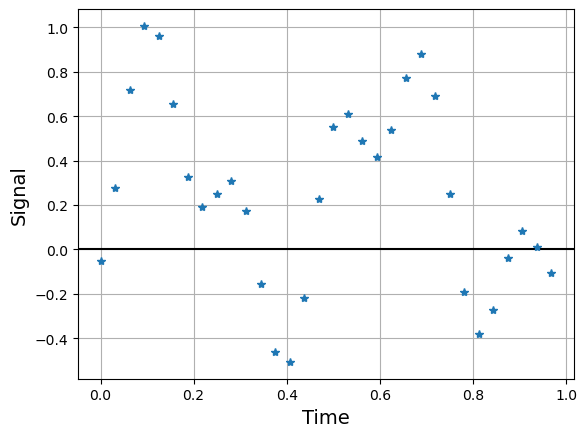

In [5]:

T = 1
c = [0.25, 0 , 0, 0,0,-0.3]
s = [0, 0, 0.5]
M = 32 # We set the number of discrete samples here
t = np.linspace(0,T,M,endpoint = False) # need to eliminate the last point
yDigital = trignometricSignal(t,c,s)
print(c,s)
plt.figure()
plt.axhline(0, color='black')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Signal', fontsize=14)
plt.grid(visible=True)
plt.plot(t,yDigital,'*')

## DFT Signal Processing

Number of samples M: 32


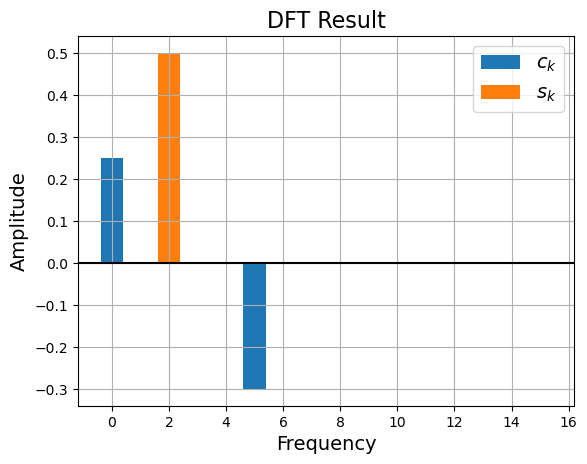

In [6]:

M = len(yDigital)
print("Number of samples M:", M)
DFTMatrix = createDFTMatrix(M)
phi = (1/M)*np.matmul(DFTMatrix,yDigital)

[c,s] = processDFTResult(phi)
 
plotDFTResult(c,s,M)


## QFT with 2 qubits

[[ 5.000000e-01+0.j   5.000000e-01+0.j   5.000000e-01+0.j
   5.000000e-01+0.j ]
 [ 5.000000e-01+0.j   3.061617e-17+0.5j -5.000000e-01+0.j
  -3.061617e-17-0.5j]
 [ 5.000000e-01+0.j  -5.000000e-01+0.j   5.000000e-01+0.j
  -5.000000e-01+0.j ]
 [ 5.000000e-01+0.j  -3.061617e-17-0.5j -5.000000e-01+0.j
   3.061617e-17+0.5j]]
Counts: {'01': 261, '10': 256, '00': 252, '11': 231}


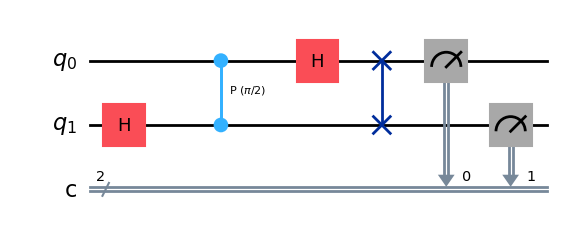

In [7]:
circuit = QuantumCircuit(2, 2)  
circuit.h(1)
circuit.cp(np.pi/2,0,1) 
circuit.h(0) 
circuit.swap(0,1)
print(np.array(Operator(circuit).data))
circuit.measure([0,1], [0,1]) 
counts = simulateCircuit(circuit,1000)
print('Counts:',counts)
circuit.draw('mpl') 

## Qiskit's QFTGate

U from circuit:
 [[ 5.00000000e-01+0.0000000e+00j  5.00000000e-01+0.0000000e+00j
   5.00000000e-01+0.0000000e+00j  5.00000000e-01+0.0000000e+00j]
 [ 5.00000000e-01+0.0000000e+00j  3.06161700e-17+5.0000000e-01j
  -5.00000000e-01+6.1232340e-17j -9.18485099e-17-5.0000000e-01j]
 [ 5.00000000e-01+0.0000000e+00j -5.00000000e-01+6.1232340e-17j
   5.00000000e-01-1.2246468e-16j -5.00000000e-01+1.8369702e-16j]
 [ 5.00000000e-01+0.0000000e+00j -9.18485099e-17-5.0000000e-01j
  -5.00000000e-01+1.8369702e-16j  2.75545530e-16+5.0000000e-01j]]


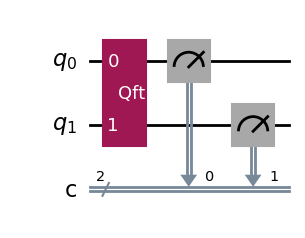

In [8]:
m = 2 # number of qubits
circuit = QuantumCircuit(m, m) 
qft = QFTGate(num_qubits=m)
UFromCircuit = Operator(qft)
print("U from circuit:\n", UFromCircuit.data)
circuit.append(qft, qargs=list(range(m)))
circuit.measure(list(range(m)),list(range(m))) 
circuit.draw('mpl')


## QFTGate with m = 3

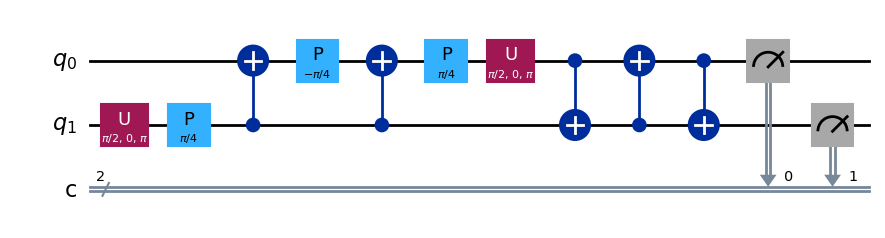

In [9]:
m = 2 # number of qubits
circuit = QuantumCircuit(m, m) 
qft = QFTGate(num_qubits=m)
circuit.append(qft, qargs=list(range(m)))
circuit.measure(list(range(m)),list(range(m))) 
circuit.decompose(reps=2).draw('mpl')


## QFT Signal Processing using Qiskit's QFTGate

Number of qubits: 5


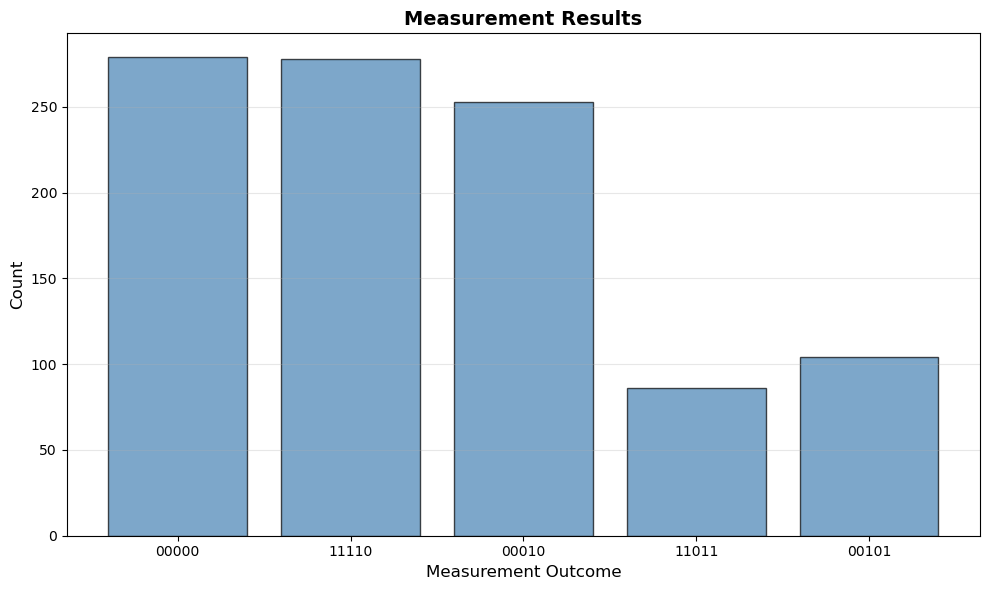

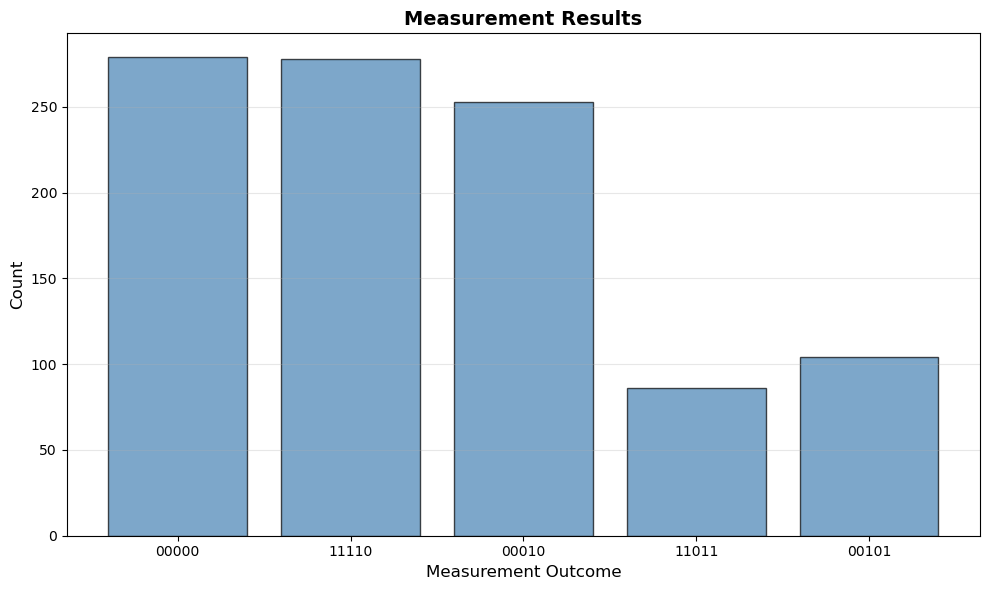

In [10]:


M = 32
t = np.linspace(0,1,M,endpoint = False) # need to eliminate the last point
y = trignometricSignal(t,c,s)
shots = 1000
counts = QFTSignalProcessing(y,shots)
plot_measurement_results(counts)

### Processing QFT results

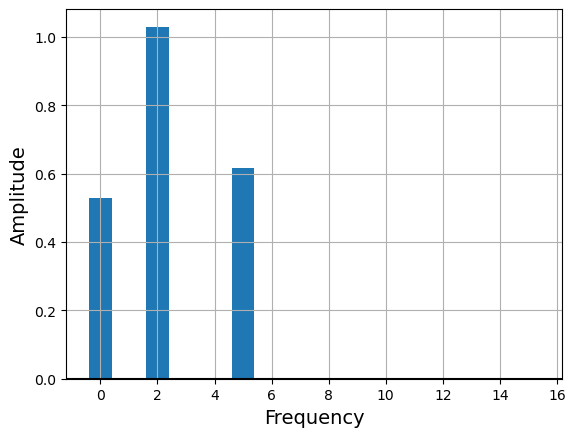

In [11]:


ampl = processQFTResult(M, counts,shots)

plt.figure()
plt.bar(list(range(0,int(M/2))),ampl)
plt.axhline(0, color='black')
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Amplitude', fontsize=14)
plt.grid(visible=True)
plt.show()

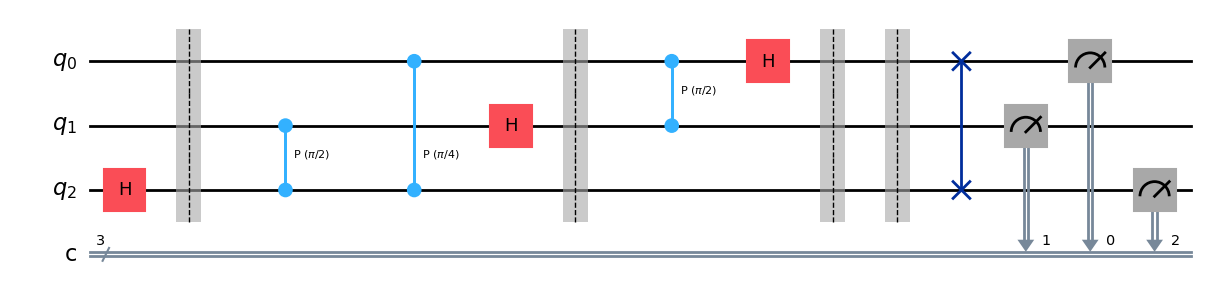

In [12]:

m = 3
circuit = myQFT(m)
circuit.measure(list(range(m)),list(range(m))) 
circuit.draw('mpl') 

### QFT Matrix Verification

In [13]:


m = 2
circuit = myQFT(m)
UFromCircuit = Operator(circuit)
UExact = createQFTMatrix(2**m)
print("Error: ", round(np.linalg.norm(UFromCircuit-UExact),10))

Error:  0.0


## Inverse QFT

<IPython.core.display.Latex object>

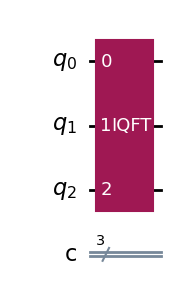

In [14]:
m = 3 # number of qubits
circuit = QuantumCircuit(m, m) 
iqft = QFTGate(num_qubits=m).inverse()
iqft._name = 'IQFT'
circuit.append(iqft, qargs=list(range(m)))

psi = Statevector(circuit)
display(psi.draw('latex'))
circuit.draw('mpl')